<font color ='red'>
Content :
    
1. [Import Libraries](#1)
    
2. [Load Data](#2)     
    
3. [Visualization](#3)    
    
4. [Classification](#4)

<a id = "1"></a>
# Import Libraries


In [1]:
# Libraries
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # Train and Test Split
from sklearn.linear_model import LogisticRegression # Logistic Regression Classification
from sklearn.neighbors import KNeighborsClassifier # Knn Classification
from sklearn.svm import SVC # Support Vector Machine Classification
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.metrics import confusion_matrix # Confusion Matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-uci/heart.csv


<a id = "2"></a>
# Load Data

In [2]:
data = pd.read_csv(r"/kaggle/input/heart-disease-uci/heart.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<a id = "3"></a>
# Visualization

In [6]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

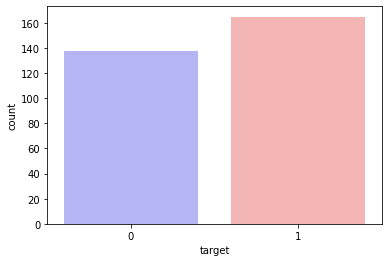

In [7]:
sns.countplot(x="target", data=data, palette="bwr")
plt.show()

In [8]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


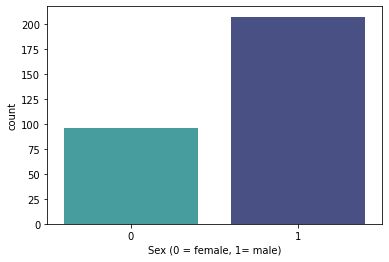

In [9]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [10]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(data.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


<a id = "4"></a>
# Classification

In [11]:
y = data.target.values
x_data = data.drop(["target"],axis=1)
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)) # normalization 

In [12]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

We have a data which classified if patients have heart disease or not according to features in it. We will try to use this data to create a model which tries predict if a patient has this disease or not. We will use following algorithms:

1. [Logistic Regression Classification](#5)
    
2. [K - Nearest Neighbor Classification](#6)     
    
3. [Support Vector Machine Classification](#7)    
    
4. [Naive Bayes Classification](#8)

5. [Decision Tree Classification](#9)    
    
6. [Random Forest Classification](#10)


<a id = "5"></a>
# Logistic Regression Classification

In [13]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Score is {}".format(lr.score(x_test,y_test)))

Score is 0.7802197802197802


In [14]:
# Confusion Martix
y_pred = lr.predict(x_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred)
print("Confusion Martix:")
print(cm)

Confusion Martix:
[[30 11]
 [ 9 41]]


<a id = "6"></a>
# K - Nearest Neighbor Classification

In [15]:
knn = KNeighborsClassifier(n_neighbors = 3) # n_neighbors = k
knn.fit(x_train,y_train)
print(" {} k Score: {} ".format(3,knn.score(x_test,y_test)))

 3 k Score: 0.7472527472527473 


In [16]:
# Confusion Martix
y_pred = knn.predict(x_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred)
print("Confusion Martix:")
print(cm)

Confusion Martix:
[[30 11]
 [12 38]]


<a id = "7"></a>
# Support Vector Machine Classification

In [17]:
svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
print("Score: ",svm.score(x_test,y_test))

Score:  0.7472527472527473


In [18]:
# Confusion Martix
y_pred = svm.predict(x_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred)
print("Confusion Martix:")
print(cm)

Confusion Martix:
[[30 11]
 [12 38]]


<a id = "8"></a>
# Naive Bayes Classification

In [19]:
nb = GaussianNB()
nb.fit(x_train,y_train)
print("Score: ",nb.score(x_test,y_test))

Score:  0.7912087912087912


In [20]:
# Confusion Martix
y_pred = nb.predict(x_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred)
print("Confusion Martix:")
print(cm)

Confusion Martix:
[[32  9]
 [10 40]]


<a id = "9"></a>
# Decision Tree Classification

In [21]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Score: ", dt.score(x_test,y_test))

Score:  0.7032967032967034


In [22]:
# Confusion Martix
y_pred = dt.predict(x_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred)
print("Confusion Martix:")
print(cm)

Confusion Martix:
[[29 12]
 [15 35]]


<a id = "10"></a>
# Random Forest Classification

In [23]:
rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)
print("Score: ",rf.score(x_test,y_test))

Score:  0.7252747252747253


In [24]:
# Confusion Martix
y_pred = rf.predict(x_test)
y_true = y_test
cm = confusion_matrix(y_true,y_pred)
print("Confusion Martix:")
print(cm)

Confusion Martix:
[[29 12]
 [13 37]]
